In [1]:
# Importing liabraries
import numpy as np
import pandas as pd
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
from prophet import Prophet

# Enable inline plotting
%matplotlib inline

In [2]:
aep=pd.read_csv("../data/AEP_hourly.csv")
df_main = aep.copy()

In [3]:
df_main.rename(columns={'Datetime': 'ds', 'AEP_MW': 'y'}, inplace=True)
df_main

ds        y
0       2004-12-31 01:00:00  13478.0
1       2004-12-31 02:00:00  12865.0
2       2004-12-31 03:00:00  12577.0
3       2004-12-31 04:00:00  12517.0
4       2004-12-31 05:00:00  12670.0
...                     ...      ...
121268  2018-01-01 20:00:00  21089.0
121269  2018-01-01 21:00:00  20999.0
121270  2018-01-01 22:00:00  20820.0
121271  2018-01-01 23:00:00  20415.0
121272  2018-01-02 00:00:00  19993.0

[121273 rows x 2 columns]

In [4]:
# df["y"].round().astype("int")

### Select when the data begins

In [5]:
df_main

ds        y
0       2004-12-31 01:00:00  13478.0
1       2004-12-31 02:00:00  12865.0
2       2004-12-31 03:00:00  12577.0
3       2004-12-31 04:00:00  12517.0
4       2004-12-31 05:00:00  12670.0
...                     ...      ...
121268  2018-01-01 20:00:00  21089.0
121269  2018-01-01 21:00:00  20999.0
121270  2018-01-01 22:00:00  20820.0
121271  2018-01-01 23:00:00  20415.0
121272  2018-01-02 00:00:00  19993.0

[121273 rows x 2 columns]

Convert MW to GW

In [6]:
df_div=df_main.copy()
df=df_main.copy()
df_div_y=df_div['y'].div(1000)
df["y"]=df_div_y
type(df['y'][2])

numpy.float64

In [7]:
res = df[~(df['ds'] < '2015-01-01')]


In [8]:
res_b=res.copy()
res_c=res.copy()
res_b=round(res["y"]).astype("int")
res_c["y"]=res_b
res_c

ds   y
81098   2015-01-01 00:00:00  16
89834   2015-12-31 01:00:00  12
89835   2015-12-31 02:00:00  12
89836   2015-12-31 03:00:00  12
89837   2015-12-31 04:00:00  12
...                     ...  ..
121268  2018-01-01 20:00:00  21
121269  2018-01-01 21:00:00  21
121270  2018-01-01 22:00:00  21
121271  2018-01-01 23:00:00  20
121272  2018-01-02 00:00:00  20

[31440 rows x 2 columns]

### Generate the model

In [9]:
df=res_c
df.describe()

y
count  31440.000000
mean      14.805184
std        2.531231
min       10.000000
25%       13.000000
50%       14.000000
75%       16.000000
max       25.000000

In [10]:
train = df.iloc[:len(df) - 700]
test = df.iloc[len(df) - 700:]

In [11]:
m = Prophet()
m.fit(train)

c:\Users\alvar\anaconda3\envs\asiot\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [12]:
# import joblib 
# joblib.dump(m, 'prophet_model_cut.pkl') # Guardo el modelo.

### Predictions

In [13]:
# import joblib 
# m = joblib.load("prophet_model_cut.pkl")

In [14]:
# future = m.make_future_dataframe(periods=365, freq="H") #MS for monthly, H for hourly
future = m.make_future_dataframe(periods=700) #MS for monthly, H for hourly
forecast = m.predict(future)

c:\Users\alvar\anaconda3\envs\asiot\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\alvar\anaconda3\envs\asiot\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [15]:
mascara = (forecast["ds"] >= '2018-03-01') & (forecast["ds"] <= '2018-03-20')

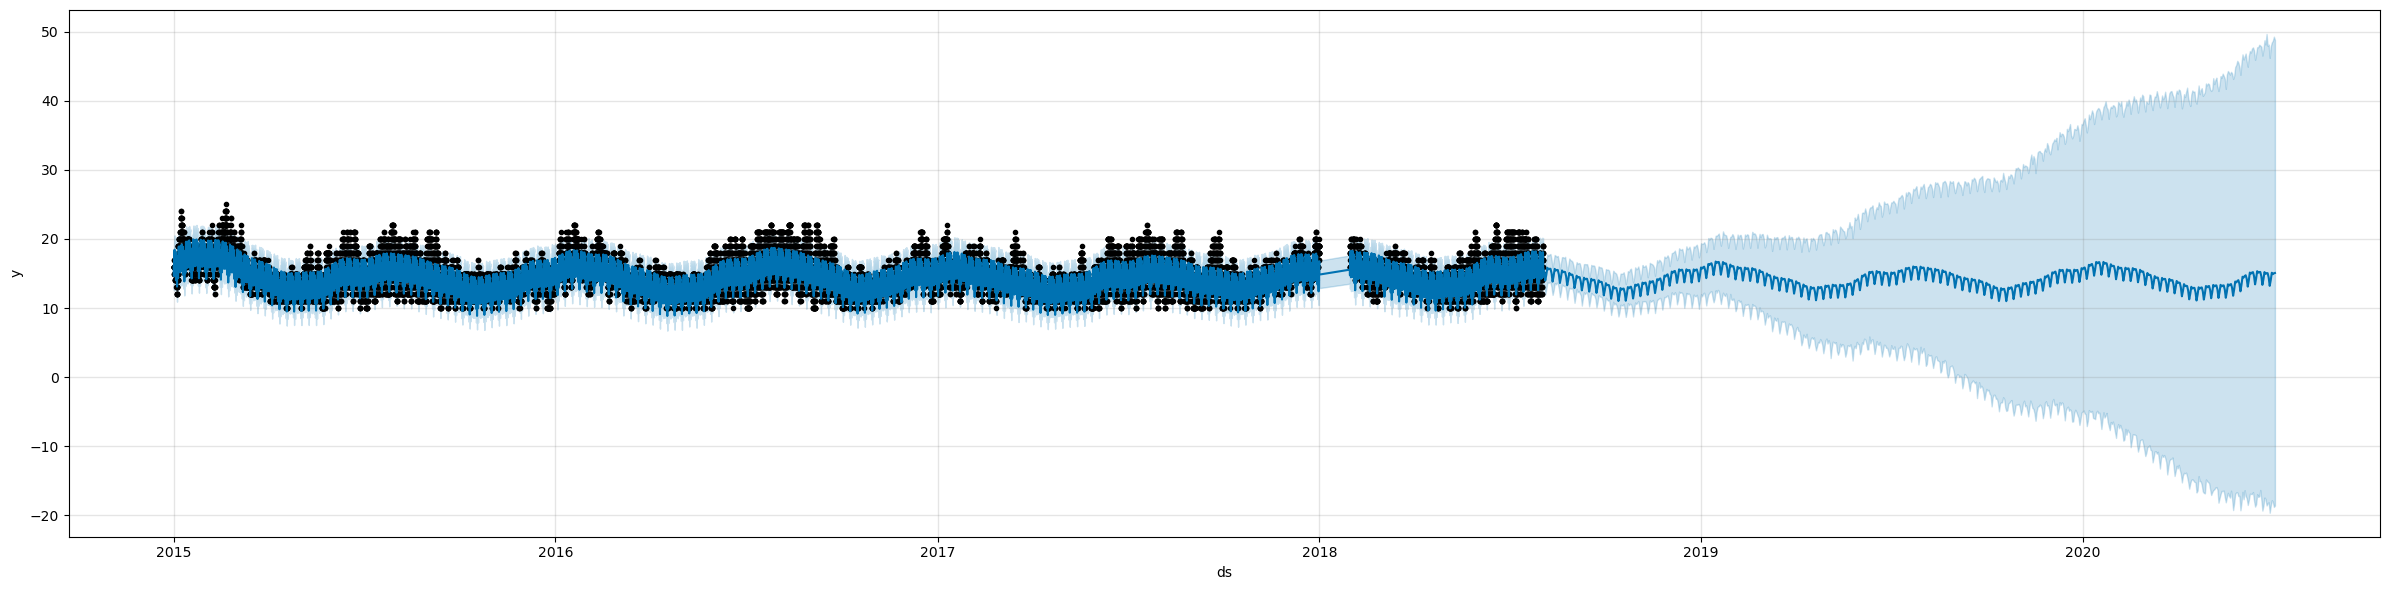

In [16]:
fig = m.plot(forecast, figsize=(24,6))

In [17]:
from prophet.plot import plot_components_plotly

In [18]:
plot_components_plotly(m,forecast)

c:\Users\alvar\anaconda3\envs\asiot\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\alvar\anaconda3\envs\asiot\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\Users\alvar\anaconda3\envs\asiot\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


# Model evaluation

- **yhat**: forecast
- **yhat_lower, yhat_upper**: uncertainty interval

In [19]:
from statsmodels.tools.eval_measures import rmse
from statsmodels.tools.eval_measures import meanabs

In [20]:
predictions = forecast.iloc[-700:]['yhat']

In [21]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,test['y']))
print("Mean Absolute Error:", meanabs(predictions,test['y']))
print("Mean Value of Test Dataset:", test['y'].mean())

Root Mean Squared Error between actual and  predicted values:  4.548614351413968
Mean Absolute Error: 3.7599509089464087
Mean Value of Test Dataset: 17.58


In [22]:
forecast

ds      trend  ...  multiplicative_terms_upper       yhat
0     2015-01-01 00:00:00  15.334265  ...                         0.0  16.106144
1     2015-01-01 01:00:00  15.335812  ...                         0.0  15.426046
2     2015-01-01 02:00:00  15.337358  ...                         0.0  14.924874
3     2015-01-01 03:00:00  15.338904  ...                         0.0  14.650129
4     2015-01-01 04:00:00  15.340451  ...                         0.0  14.641184
...                   ...        ...  ...                         ...        ...
31432 2020-06-29 00:00:00  14.954779  ...                         0.0  14.048094
31433 2020-06-30 00:00:00  14.954708  ...                         0.0  15.112718
31434 2020-07-01 00:00:00  14.954637  ...                         0.0  14.904909
31435 2020-07-02 00:00:00  14.954566  ...                         0.0  15.030433
31436 2020-07-03 00:00:00  14.954496  ...                         0.0  15.077806

[31437 rows x 22 columns]